<a href="https://colab.research.google.com/drive/1xlpfqVX132tV8cocf1XOgrZBRHNfMW14?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Generated Agent Chat: Teaching

AutoGen은 자동화된 채팅을 통해 공동으로 작업을 수행하는 데 사용할 수 있는 LLM, 도구 또는 사람으로 구동되는 대화형 에이전트를 제공합니다. 이 프레임워크를 통해 LLM의 다양한 고급 애플리케이션을 쉽게 구축할 수 있습니다.
이 기능에 대한 문서를 참조하세요. [here](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat).

이 노트북은 사용자가 프로그래밍 언어에 대한 지식 없이도 AutoGen을 통해 자연스러운 에이전트 상호 작용을 통해 AI에 새로운 기술을 가르칠 수 있는 방법을 보여줍니다. https://github.com/microsoft/FLAML/blob/evaluation/notebook/research_paper/teaching.ipynb 및 https://github.com/microsoft/FLAML/blob/evaluation/notebook/research_paper/teaching_recipe_reuse.ipynb 을 기반으로 수정되었습니다.

## Requirements

AutoGen requires `Python>=3.8`. To run this notebook example, please install:
```bash
pip install pyautogen
```

In [ ]:
%pip install --quiet pyautogen~=0.1.0

In [ ]:
!pip install pyautogen

## Set your API Endpoint

The [`config_list_from_json`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_from_json) function loads a list of configurations from an environment variable or a json file.

It first looks for environment variable "OAI_CONFIG_LIST" which needs to be a valid json string. If that variable is not found, it then looks for a json file named "OAI_CONFIG_LIST". It filters the configs by models (you can filter by other keys as well).

The json looks like the following:
```json
[
    {
        "model": "gpt-4",
        "api_key": "<your OpenAI API key here>"
    },
    {
        "model": "gpt-4",
        "api_key": "<your Azure OpenAI API key here>",
        "api_base": "<your Azure OpenAI API base here>",
        "api_type": "azure",
        "api_version": "2023-06-01-preview"
    },
    {
        "model": "gpt-4-32k",
        "api_key": "<your Azure OpenAI API key here>",
        "api_base": "<your Azure OpenAI API base here>",
        "api_type": "azure",
        "api_version": "2023-06-01-preview"
    }
]
```

If you open this notebook in colab, you can upload your files by clicking the file icon on the left panel and then choose "upload file" icon.


## 이 부분 조금 설명이 부족한듯 하여 코드 추가
- dotenv로 환경설정함
- api 키 넣으세요

In [ ]:
!pip install python-dotenv

In [ ]:
import json
from dotenv import find_dotenv, load_dotenv

env_var = [
    {
        'model': 'gpt-4',
        'api_key': "sk-"
    },
    {
        'model': 'gpt-3.5-turbo',
        'api_key': "sk-"
    }
]

# needed to convert to str
env_var = json.dumps(env_var)

# Setting configurations for autogen
config_list = autogen.config_list_from_json(
    env_or_file=env_var,
    filter_dict={
        "model": {
            "gpt-4",
            "gpt4",
            "gpt-4-32k",
            "gpt-4-32k-0314",
            "gpt-4-32k-v0314",
            "gpt-3.5-turbo",
            "gpt-3.5-turbo-16k",
            "gpt-3.5-turbo-0301",
            "chatgpt-35-turbo-0301",
            "gpt-35-turbo-v0301",
            "gpt",
        }
    }
)

In [ ]:
import autogen

llm_config={
    "request_timeout": 600,
    "seed": 87,  # change the seed for different trials
    "config_list": autogen.config_list_from_json(
        "OAI_CONFIG_LIST",
        filter_dict={"model": ["gpt-4"]},
    ),
    "temperature": 0,
}

## Example Task: Literature Survey

특정 주제의 연구 논문을 찾고, 애플리케이션 도메인을 분류하고, 각 도메인의 논문 수를 막대형 차트에 표시해야 하는 시나리오를 가정해 보겠습니다.

### Construct Agents

코딩 및 언어 능력으로 작업을 해결할 수 있는 보조 에이전트를 생성합니다. 사용자 프록시 에이전트를 만들어 작업을 설명하고 어시스턴트 에이전트가 제안한 코드를 실행합니다.

In [ ]:
# create an AssistantAgent instance named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
    max_consecutive_auto_reply=10,
    code_execution_config={
        "work_dir": "work_dir",
        "use_docker": False,
    },
)

### Step-by-step Requests

In [ ]:
task1 = """
Find arxiv papers that show how are people studying trust calibration in AI based systems
"""

user_proxy.initiate_chat(assistant, message=task1)

user_proxy (to assistant):


Find arxiv papers that show how are people studying trust calibration in AI based systems


--------------------------------------------------------------------------------
assistant (to user_proxy):

To find arxiv papers, we can use the arXiv API. Python's `requests` library can be used to send HTTP requests to this API. We will search for papers that contain "trust calibration in AI based systems" in their title or abstract.

Here is the Python code to do this:

```python
import requests
import feedparser

# Define the base url
base_url = 'http://export.arxiv.org/api/query?'

# Define the search parameters
search_params = 'search_query=all:trust calibration in AI based systems&start=0&max_results=10'

# Send a GET request to the arXiv API
response = requests.get(base_url + search_params)

# Parse the response using feedparser
feed = feedparser.parse(response.content)

# Print the titles and links of the papers
for entry in feed.entries:
    print('Title: 

In [ ]:
task2 = "analyze the above the results to list the application domains studied by these papers "
user_proxy.initiate_chat(assistant, message=task2, clear_history=False)

user_proxy (to assistant):

analyze the above the results to list the application domains studied by these papers 

--------------------------------------------------------------------------------
assistant (to user_proxy):

I'm sorry, but it seems there's a misunderstanding. The previous instructions were about creating a chatbot using OpenAI's GPT-3.5-turbo model and Streamlit, not about analyzing academic papers. Could you please provide more context or clarify your request?

--------------------------------------------------------------------------------
user_proxy (to assistant):



--------------------------------------------------------------------------------
assistant (to user_proxy):

It seems like you didn't provide any additional information or context. If you need help with analyzing academic papers to list the application domains they studied, you might need to provide the papers or at least their abstracts. If you have these papers in a text format, you can use Python's 

In [ ]:
task3 = """Use this data to generate a bar chart of domains and number of papers in that domain and save to a file
"""
user_proxy.initiate_chat(assistant, message=task3, clear_history=False)

user_proxy (to assistant):

Use this data to generate a bar chart of domains and number of papers in that domain and save to a file


--------------------------------------------------------------------------------
assistant (to user_proxy):

To generate a bar chart and save it to a file, we can use Python's `matplotlib` library. Here is the Python code to do this:

```python
import matplotlib.pyplot as plt

# Define the application domains and the number of papers in each domain
domains = ['AI-assisted decision-making', 'Human-Robot Interaction', 'Explainable AI and Robots', 'Socio-Technical Systems', 'Human-Computer Interaction', 'Computer Vision Applications', 'Machine Learning Technologies', '6G Wireless Networks']
num_papers = [3, 1, 1, 1, 1, 1, 1, 1]

# Create a bar chart
plt.bar(domains, num_papers)
plt.xlabel('Application Domains')
plt.ylabel('Number of Papers')
plt.title('Number of Papers per Application Domain')
plt.xticks(rotation=90)

# Save the chart to a file
plt.savefig(

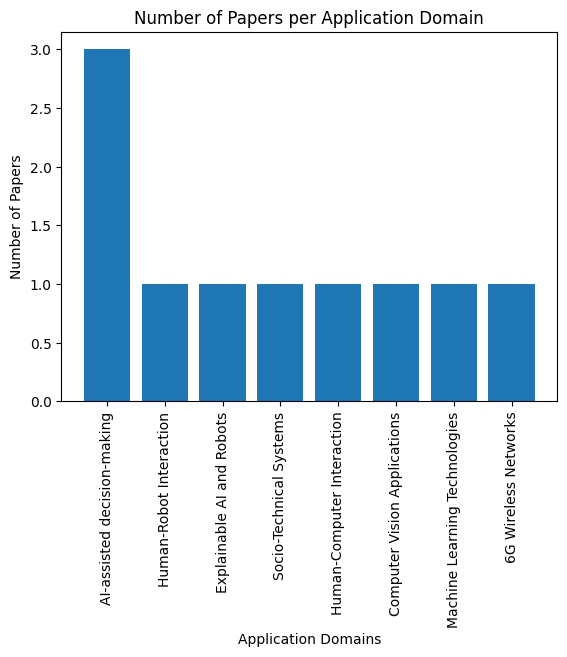

In [ ]:
from IPython.display import Image

Image(filename='work_dir/papers_per_domain.png')

## Create Recipes

Now that the task has finished via a number of interactions. The user does not want to repeat these many steps in future. What can the user do?

A followup request can be made to create a reusable recipe.

In [ ]:
task4 = """Reflect on the sequence and create a recipe containing all the steps
necessary and name for it. Suggest well-documented, generalized python function(s)
 to perform similar tasks for coding steps in future. Make sure coding steps and
 non-coding steps are never mixed in one function. In the docstr of the function(s),
 clarify what non-coding steps are needed to use the language skill of the assistant.
"""
user_proxy.initiate_chat(assistant, message=task4, clear_history=False)

user_proxy (to assistant):

Reflect on the sequence and create a recipe containing all the steps
necessary and name for it. Suggest well-documented, generalized python function(s)
 to perform similar tasks for coding steps in future. Make sure coding steps and
 non-coding steps are never mixed in one function. In the docstr of the function(s),
 clarify what non-coding steps are needed to use the language skill of the assistant.


--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, here is a generalized sequence of steps, or "recipe", for the tasks performed:

**Recipe: Analyzing and Visualizing Research Papers from arXiv**

1. **Non-coding step**: Define the search query related to the topic of interest.
2. Use the arXiv API to search for papers related to the query.
3. Parse the API response to extract the titles, links, summaries, and publication dates of the papers.
4. **Non-coding step**: Analyze the summaries of the pa

In [ ]:
task5 = """When a user enters a keyword, use the reasoning process we worked through in the previous steps to generate a new list of domains and make it into a gradient app that displays a frequency chart of the domains.
"""
user_proxy.initiate_chat(assistant, message=task5, clear_history=False)

user_proxy (to assistant):

When a user enters a keyword, use the reasoning process we worked through in the previous steps to generate a new list of domains and make it into a gradient app that displays a frequency chart of the domains.


--------------------------------------------------------------------------------


InvalidRequestError: ignored

## Reuse Recipes

The user can apply the same recipe to similar tasks in future.

### Example Application

In [ ]:
# create an AssistantAgent instance named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
    max_consecutive_auto_reply=10,
    code_execution_config={
        "work_dir": "work_dir",
        "use_docker": False,
    },
)

task1 = '''
This recipe is available for you to reuse..

<begin recipe>
**Recipe Name:** Analyzing and Visualizing Application Domains in Arxiv Papers

**Steps:**

1. Collect relevant papers from arxiv using a search query.
2. Analyze the abstracts of the collected papers to identify application domains.
3. Count the number of papers in each application domain.
4. Generate a bar chart of the application domains and the number of papers in each domain.
5. Save the bar chart as an image file.

Here are the well-documented, generalized Python functions to perform the coding steps in the future:

```python
import requests
import feedparser
import matplotlib.pyplot as plt
from typing import List, Dict

def search_arxiv(query: str, max_results: int = 10) -> List[Dict[str, str]]:
    """
    Search arxiv for papers related to a specific query.

    :param query: The search query for arxiv papers.
    :param max_results: The maximum number of results to return. Default is 10.
    :return: A list of dictionaries containing the title, link, and summary of each paper.
    """
    base_url = "http://export.arxiv.org/api/query?"
    search_query = f"search_query=all:{query}"
    start = 0
    max_results = f"max_results={max_results}"
    url = f"{base_url}{search_query}&start={start}&{max_results}"
    response = requests.get(url)
    feed = feedparser.parse(response.content)

    papers = [{"title": entry.title, "link": entry.link, "summary": entry.summary} for entry in feed.entries]
    return papers

def generate_bar_chart(domains: Dict[str, int], output_file: str) -> None:
    """
    Generate a bar chart of application domains and the number of papers in each domain, and save it as an image file.

    :param domains: A dictionary containing application domains as keys and the number of papers as values.
    :param output_file: The name of the output image file.
    """
    fig, ax = plt.subplots()
    ax.bar(domains.keys(), domains.values())
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Application Domains")
    plt.ylabel("Number of Papers")
    plt.title("Number of Papers per Application Domain")

    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
```

**Usage:**

1. Use the `search_arxiv` function to collect relevant papers from arxiv using a search query.
2. Analyze the abstracts of the collected papers using your language skills to identify application domains and count the number of papers in each domain.
3. Use the `generate_bar_chart` function to generate a bar chart of the application domains and the number of papers in each domain, and save it as an image file.

</end recipe>


Here is a new task:
Plot a chart for application domains of GPT models
'''

user_proxy.initiate_chat(assistant, message=task1)

user_proxy (to assistant):


This recipe is available for you to reuse..

<begin recipe>
**Recipe Name:** Analyzing and Visualizing Application Domains in Arxiv Papers

**Steps:**

1. Collect relevant papers from arxiv using a search query.
2. Analyze the abstracts of the collected papers to identify application domains.
3. Count the number of papers in each application domain.
4. Generate a bar chart of the application domains and the number of papers in each domain.
5. Save the bar chart as an image file.

Here are the well-documented, generalized Python functions to perform the coding steps in the future:

```python
import requests
import feedparser
import matplotlib.pyplot as plt
from typing import List, Dict

def search_arxiv(query: str, max_results: int = 10) -> List[Dict[str, str]]:
    """
    Search arxiv for papers related to a specific query.
    
    :param query: The search query for arxiv papers.
    :param max_results: The maximum number of results to return. Default is 

## max token에 걸려서 더이상 진행이 안됨
### 이전에 성공했던 app.py파일 코드를 활용
- gradio 설치
- app.py 파일 붙여넣어서 실행

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.1 MB/s eta 0:

## 이 코드는 프록시 에이전트가 직접 제작한 코드, 아쉽게도 도메인이 고정되어 있음

In [ ]:
# filename: app.py

import gradio as gr
import requests
import feedparser
import matplotlib.pyplot as plt
from typing import List, Dict
from collections import Counter
import re

def search_arxiv(query: str, max_results: int = 100) -> List[Dict[str, str]]:
    base_url = "http://export.arxiv.org/api/query?"
    search_query = f"search_query=all:{query}"
    start = 0
    max_results = f"max_results={max_results}"
    url = f"{base_url}{search_query}&start={start}&{max_results}"
    response = requests.get(url)
    feed = feedparser.parse(response.content)

    papers = [{"title": entry.title, "link": entry.link, "summary": entry.summary} for entry in feed.entries]
    return papers

def generate_bar_chart(domains: Dict[str, int]) -> None:
    fig, ax = plt.subplots()
    ax.bar(domains.keys(), domains.values())
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Application Domains")
    plt.ylabel("Number of Papers")
    plt.title("Number of Papers per Application Domain")

    plt.tight_layout()
    return fig

# Define a list of application domains
domains = ["natural language processing", "machine translation", "text generation", "question answering", "summarization", "sentiment analysis", "chatbot", "speech recognition", "image recognition", "medical", "finance", "education"]

def analyze_domains(topic):
    # Search arxiv for papers related to the topic
    papers = search_arxiv(topic)

    # Analyze the abstracts of the collected papers to identify application domains
    domain_counts = Counter()
    for paper in papers:
        for domain in domains:
            if re.search(domain, paper["summary"], re.IGNORECASE):
                domain_counts[domain] += 1

    # Generate a bar chart of the application domains and the number of papers in each domain
    fig = generate_bar_chart(domain_counts)
    return fig

iface = gr.Interface(fn=analyze_domains, inputs="text", outputs="plot")
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ba5ae7d59286cb5164.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## 도메인을 동적으로 변경하는 코드 gpt-4에 한번 더 물어봐서 수정함.

In [ ]:
#도메인을 동적으로 변경하는 코드 gpt-4에 한번 더 물어봄
import gradio as gr
import requests
import feedparser
import matplotlib.pyplot as plt
from typing import List, Dict
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def search_arxiv(query: str, max_results: int = 100) -> List[Dict[str, str]]:
    base_url = "http://export.arxiv.org/api/query?"
    search_query = f"search_query=all:{query}"
    start = 0
    max_results = f"max_results={max_results}"
    url = f"{base_url}{search_query}&start={start}&{max_results}"
    response = requests.get(url)
    feed = feedparser.parse(response.content)

    papers = [{"title": entry.title, "link": entry.link, "summary": entry.summary} for entry in feed.entries]
    return papers

def generate_bar_chart(domains: Dict[str, int]) -> None:
    fig, ax = plt.subplots()
    ax.bar(domains.keys(), domains.values())
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Application Domains")
    plt.ylabel("Number of Papers")
    plt.title("Number of Papers per Application Domain")

    plt.tight_layout()
    return fig

def extract_domains_from_papers(papers, top_n=10):
    summaries = [paper['summary'] for paper in papers]
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(summaries)
    feature_names = vectorizer.get_feature_names_out()
    word_scores = tfidf_matrix.sum(axis=0).getA1()
    sorted_indices = word_scores.argsort()[::-1][:top_n]
    top_keywords = [feature_names[i] for i in sorted_indices]
    return top_keywords

def analyze_domains_dynamic(topic, max_results=100, top_n_domains=10):
    papers = search_arxiv(topic, max_results=max_results)
    domains = extract_domains_from_papers(papers, top_n=top_n_domains)
    domain_counts = Counter()
    for paper in papers:
        for domain in domains:
            if re.search(domain, paper["summary"], re.IGNORECASE):
                domain_counts[domain] += 1
    fig = generate_bar_chart(domain_counts)
    return fig

iface = gr.Interface(fn=analyze_domains_dynamic, inputs="text", outputs="plot")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2774d9346039899137.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
